In [1]:
from decimal import Decimal
import numpy as np
import pandas as pd
from datetime import timedelta
import requests
import json
import datetime
from scipy import stats
from scipy.stats import gamma
from scipy.stats import powerlaw
import scipy.stats as stats
from scipy.odr import *
import matplotlib.pyplot as plt
import math
import seaborn as sns


from IPython.display import HTML
from matplotlib import animation, rc
rc('animation', html='jshtml', embed_limit=50)
from matplotlib import cm
import matplotlib.ticker as ticker

sns.set_style("whitegrid")

In [2]:
dist = 5 * np.random.rand(100,1)
time = 10 * np.random.rand(100,1)

In [3]:
dist.mean()

2.5549496070135076

In [4]:
time.mean()

4.971164906150623

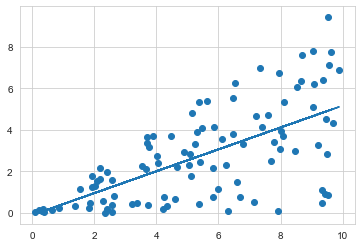

In [5]:
time = 10 * np.random.rand(100)

dist = time * np.random.rand(100)
slope, intercept, r_value, p_value, std_err = stats.linregress(time,dist)
plt.scatter(time,dist)
plt.plot(time, slope*time + intercept)

In [6]:
dist = 5 * np.random.rand(100,1)

time = 10 * np.random.rand(100,1)
# time = np.arange(5)
# dist = np.arange(4)
dist_dim = len(dist)
time_dim = len(time)
dist_square = np.repeat(dist, dist_dim,axis =0)
time_square = np.repeat(time, time_dim,axis =0)
incentives = np.dot(time, dist.T)
# np.matmul(time.T, dist)

In [7]:
time = 10 * np.random.rand(100)

dist = time * np.random.rand(100)


dist.shape


(100,)

In [8]:
time.shape

(100,)

In [9]:
slope, intercept, r_value, p_value, std_err = stats.linregress(time,dist)

In [10]:
p_value

7.542895756925411e-14

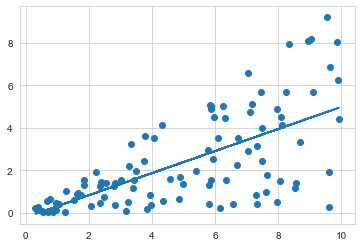

In [11]:
plt.scatter(time,dist)
plt.plot(time, slope*time + intercept)

In [12]:
N_iters = 100
dist = np.ones(N_iters)
dist_mean = np.ones(N_iters)
time = np.ones(N_iters)
time_mean = np.ones(N_iters)
slope = np.ones(N_iters)
intercept = np.ones(N_iters)
std_err = np.ones(N_iters)

# time = np.ones(N_iters)

for n in range(3, N_iters):
    time[n] = 10 * np.random.rand()
    dist[n] = 0.5 * time[n] * np.random.rand()
    slope[n], intercept[n], r_value, p_value, std_err[n] = stats.linregress(time[0:n],dist[0:n])
    time_mean[n] = time[0:n].mean()
    dist_mean[n] = dist[0:n].mean()


C:\Users\mbarl\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\mbarl\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: invalid value encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


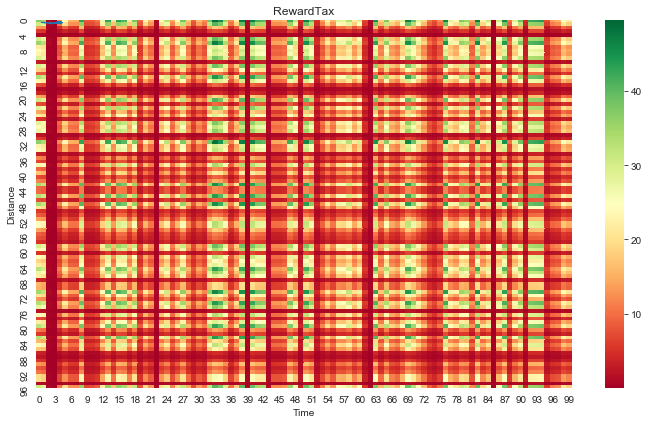

In [13]:
fig, ax = plt.subplots(figsize=(10,6))
# plot_data['Incentive']  = dist / (time + 1)

ax = sns.heatmap(incentives , cmap = 'RdYlGn')# ,annot=True, linewidths=.5, fmt = '.1f')
# ax = sns.clustermap(incentives , cmap = 'RdYlGn')# ,annot=True, linewidths=.5, fmt = '.1f')

plt.plot(time_mean, dist_mean)
ax.set_xlabel('Time')
ax.set_ylabel('Distance')
ax.set_title('Reward' + 'Tax')
# ax.set_ylim(len(irr_df), -1.5)

fig.tight_layout()
plt.show()

In [14]:
def linear_func(p, x):
    m, c = p
    return m*x + c

linear_model = Model(linear_func)
data = RealData(time, dist)
odr = ODR(data, linear_model, beta0=[0., 1.])
out = odr.run()


In [15]:

for t in range(1,len(time)):
    linear_model = Model(linear_func)
    data = RealData(time[0:t], dist[0:t])
    odr = ODR(data, linear_model, beta0=[0., 1.])
    out = odr.run()

In [16]:
slope

array([1.        , 1.        , 1.        ,        nan, 0.13827574,
       0.1301621 , 0.21580402, 0.25653854, 0.25864535, 0.24843063,
       0.08692901, 0.09306199, 0.11450432, 0.12755887, 0.07448069,
       0.08619538, 0.04003494, 0.04550635, 0.04037547, 0.04863623,
       0.05504886, 0.04642838, 0.05081791, 0.05334171, 0.05904134,
       0.06868201, 0.07443922, 0.08200876, 0.09094578, 0.09020407,
       0.07949924, 0.12357868, 0.12308491, 0.12450838, 0.12259624,
       0.11597402, 0.11021055, 0.15124174, 0.15046641, 0.14438204,
       0.14428037, 0.14528203, 0.14505588, 0.14519461, 0.14366168,
       0.16246794, 0.15997403, 0.15799584, 0.14365842, 0.14755125,
       0.15272204, 0.15308379, 0.15638966, 0.18387506, 0.18564184,
       0.17163828, 0.16753939, 0.1687872 , 0.18142254, 0.18390507,
       0.18671755, 0.17899741, 0.18115181, 0.1860135 , 0.18823425,
       0.19378124, 0.19420592, 0.19536724, 0.19354974, 0.20086468,
       0.19420377, 0.19312966, 0.19305251, 0.19402959, 0.19388

In [17]:
def calc_incentive(x_dist, y_dist):
    incentive = np.zeros(len(x_dist))
    for n in range(len(x_dist)):
        if x_dist[n] < 0:
            # reward = + incentive
            incentive[n] = np.abs(x_dist[n]) + np.abs(y_dist[n])
        else:
            # tax = -incentive 
            incentive[n] = - (np.abs(x_dist[n]) + np.abs(y_dist[n]))
    return incentive

In [18]:
incentive = calc_incentive(out.delta, out.eps)
# add first zero match index
incentive = np.insert(incentive, 0,0)
len(incentive)

100

In [19]:
plot_data = pd.DataFrame()
plot_data['Time'] = time
plot_data['Distance'] = dist
plot_data['Mean_Time'] = time_mean
plot_data['Mean_Distance'] = dist_mean
plot_data['Slope'] = slope
plot_data['Intercept'] = intercept
plot_data['Incentive'] = incentive 

In [20]:
fig, axs = plt.subplots(ncols=2, nrows=2,
                       figsize=(15,9),
                       gridspec_kw = {'hspace':0.4})
# print(axs)
#grid setup
gs = axs[0,0].get_gridspec()
# remove the underlying axes
for ax in axs[0:, 0:-1]:
    for i in ax:
        i.remove()


axbig = fig.add_subplot(gs[0:, 0:-1])
ax1 =  axs[0][1]
ax2 =  axs[1][1]
# ax3 =  axs[2][3]
plt.close()
axbig_colors=cm.Paired.colors

max_time = max(plot_data['Time'])
max_dist = max(plot_data['Distance'])
xlim = float(max_time*1.3)
ylim = float(max_dist*1.3)

max_reward = max(plot_data['Incentive'])
min_tax = min(plot_data['Incentive'])

ax1_max = float(max_reward*1.3)
ax2_min = float(min_tax*1.3)


def animate(i):
    axbig.clear()
#     ax1.clear()
#     ax2.clear()
#     ax3.clear()
    
    a = plot_data.iloc[0:i]['Time']
    b = plot_data.iloc[0:i]['Distance']
    x = max_time
    y = plot_data.iloc[i]['Slope'] * max_time + plot_data.iloc[i]['Intercept']
    axbig.plot([0,x],[0,y],color=axbig_colors[3])
    axbig.set_xticks(ticks=[0, 2,4,6,8,10,12])

    axbig.scatter(a,b,color=axbig_colors[1],marker='o')
#     axbig.fill([0,0,float(a),float(a)],
#             [0,float(b),float(b),0],
#             color=axbig_colors[2])
#     axbig.plot([0,float(a)],[0,float(b)],color=axbig_colors[3])
    axbig.set_xlim(left=0, right=xlim)
    axbig.set_ylim(bottom=0, top=ylim)
    axbig.set_xticks(ticks=[0, 2,4,6,8,10,12])
    axbig.set_yticks(ticks=[0, 2,4,6,8,10,12])
    axbig.set_xlabel('Time')
    axbig.set_ylabel('Distance')#, labelpad=12)
    axbig.set_title('Distance Time Routes')
#     axbig.legend(['bonding curve', 
#                'current balance', 
#                'A*B = k = {:.2E}'.format(k)],
#              loc=2)
#     labels = axbig.xaxis.get_ticklabels()
#     labels[1].set_horizontalalignment('right')
    
#     plot_data.iloc[:i+1]['UNI_supply'].astype(float).plot(ax=ax1)
    incent = plot_data.iloc[0:i]['Incentive']
#     if plot_data.iloc[i]['Incentive'] > 0:
#         reward = plot_data.iloc[i]['Incentive']
# #         x_ax = 
#     else:
#         tax = plot_data.iloc[i]['Incentive']

    
    ax1.set_xlim(left=0, right=xlim)
    ax1.set_ylim(bottom=-0.01, top=ax1_max)
#     ax1.set_xticks(ticks=[])

    if plot_data.iloc[i]['Incentive'] >= 0:
        ax1.scatter(a,incent,color='g',marker='o')

#     ax1.yaxis.tick_right()
    ax1.set_title('Reward Gradient')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Reward')
    ax2.set_xlim(left=0, right=xlim)
    ax2.set_ylim(bottom=ax2_min, top=0.01)
#     ax1.set_xticks(ticks=[])

    if plot_data.iloc[i]['Incentive'] < 0:
        ax2.scatter(a,incent,color='r',marker='o')
#     ax1.yaxis.tick_right()
    ax2.set_title('Tax Gradient')
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Tax')
    fig.suptitle('Solved Route {}'.format(
        [i]
    ))    

In [21]:
anim = animation.FuncAnimation(fig, animate, np.arange(0, len(plot_data)), interval=300)

In [22]:
HTML(anim.to_jshtml())